In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

import seaborn as sns

In [27]:
#--------DATAFRAME-----------
df = pd.read_csv('Fifa23PlayersData.csv')
df.drop(['Known As', 'On Loan'], axis=1, inplace = True)
df['Type'] = pd.cut(df['Overall'], bins=[0, 64, 74, float('Inf')], labels=['Bronze', 'Silver', 'Gold'])
df.drop('Positions Played', axis=1, inplace= True)
df.rename(columns={'Best Position':'Position'}, inplace= True)
df.rename(columns={'Full Name':'Name'}, inplace= True)
df = df.drop_duplicates()

In [3]:
df.columns

Index(['Name', 'Overall', 'Potential', 'Value(in Euro)', 'Position',
       'Nationality', 'Image Link', 'Age', 'Height(in cm)', 'Weight(in kg)',
       'TotalStats', 'BaseStats', 'Club Name', 'Wage(in Euro)',
       'Release Clause', 'Club Position', 'Contract Until',
       'Club Jersey Number', 'Joined On', 'Preferred Foot', 'Weak Foot Rating',
       'Skill Moves', 'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       '

In [76]:
columnasmodel = ['Overall', 'Potential', 'Value(in Euro)','Age', 'Height(in cm)', 'Weight(in kg)','TotalStats', 'BaseStats','Wage(in Euro)','Weak Foot Rating',
'Skill Moves','Attacking Work Rate','Defensive Work Rate', 'Crossing','Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling', 'Curve', 
'Freekick Accuracy', 'LongPassing', 'BallControl','Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance','Shot Power', 'Jumping', 'Stamina', 
'Strength', 'Long Shots','Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties','Composure', 'Marking', 'Standing Tackle', 
'Sliding Tackle']

In [77]:
dfmodel = df[columnasmodel]

In [48]:
#adaptamos la fórmula anterior para buscar -
def guiones(df):
    for c in df.columns:
        hayguion = df[c].apply(lambda x: x == '-').sum()
        print('{} - {}'.format(c, hayguion))

In [7]:
guiones(dfmodel)

Overall - 0
Potential - 0
Value(in Euro) - 0
Age - 0
Height(in cm) - 0
Weight(in kg) - 0
TotalStats - 0
BaseStats - 0
Wage(in Euro) - 0
Weak Foot Rating - 0
Skill Moves - 0
Attacking Work Rate - 0
Defensive Work Rate - 0
Crossing - 0
Finishing - 0
Heading Accuracy - 0
Short Passing - 0
Volleys - 0
Dribbling - 0
Curve - 0
Freekick Accuracy - 0
LongPassing - 0
BallControl - 0
Acceleration - 0
Sprint Speed - 0
Agility - 0
Reactions - 0
Balance - 0
Shot Power - 0
Jumping - 0
Stamina - 0
Strength - 0
Long Shots - 0
Aggression - 0
Interceptions - 0
Positioning - 0
Vision - 0
Penalties - 0
Composure - 0
Marking - 0
Standing Tackle - 0
Sliding Tackle - 0


In [8]:
dfmodel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18420 entries, 0 to 18538
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Overall              18420 non-null  int64 
 1   Potential            18420 non-null  int64 
 2   Value(in Euro)       18420 non-null  int64 
 3   Age                  18420 non-null  int64 
 4   Height(in cm)        18420 non-null  int64 
 5   Weight(in kg)        18420 non-null  int64 
 6   TotalStats           18420 non-null  int64 
 7   BaseStats            18420 non-null  int64 
 8   Wage(in Euro)        18420 non-null  int64 
 9   Weak Foot Rating     18420 non-null  int64 
 10  Skill Moves          18420 non-null  int64 
 11  Attacking Work Rate  18420 non-null  object
 12  Defensive Work Rate  18420 non-null  object
 13  Crossing             18420 non-null  int64 
 14  Finishing            18420 non-null  int64 
 15  Heading Accuracy     18420 non-null  int64 
 16  Shor

Las columnas Attacking work rate y defensive work rate vamos a pasarlas a numérico  1 2 y 3 respectivamente

In [49]:
dfmodel['Attacking Work Rate'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [50]:
dfmodel['Attacking Work Rate'].replace({'Low': 33, 'Medium': 66, 'High': 99}, inplace=True)

C:\Users\jl_12\AppData\Local\Temp\ipykernel_2348\2592486473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmodel['Attacking Work Rate'].replace({'Low': 33, 'Medium': 66, 'High': 99}, inplace=True)


In [51]:
dfmodel['Defensive Work Rate'].replace({'Low': 33, 'Medium': 66, 'High': 99}, inplace=True)

C:\Users\jl_12\AppData\Local\Temp\ipykernel_2348\4177438806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmodel['Defensive Work Rate'].replace({'Low': 33, 'Medium': 66, 'High': 99}, inplace=True)


C:\Users\jl_12\AppData\Local\Temp\ipykernel_2348\3236891515.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype = np.bool))


<AxesSubplot:>

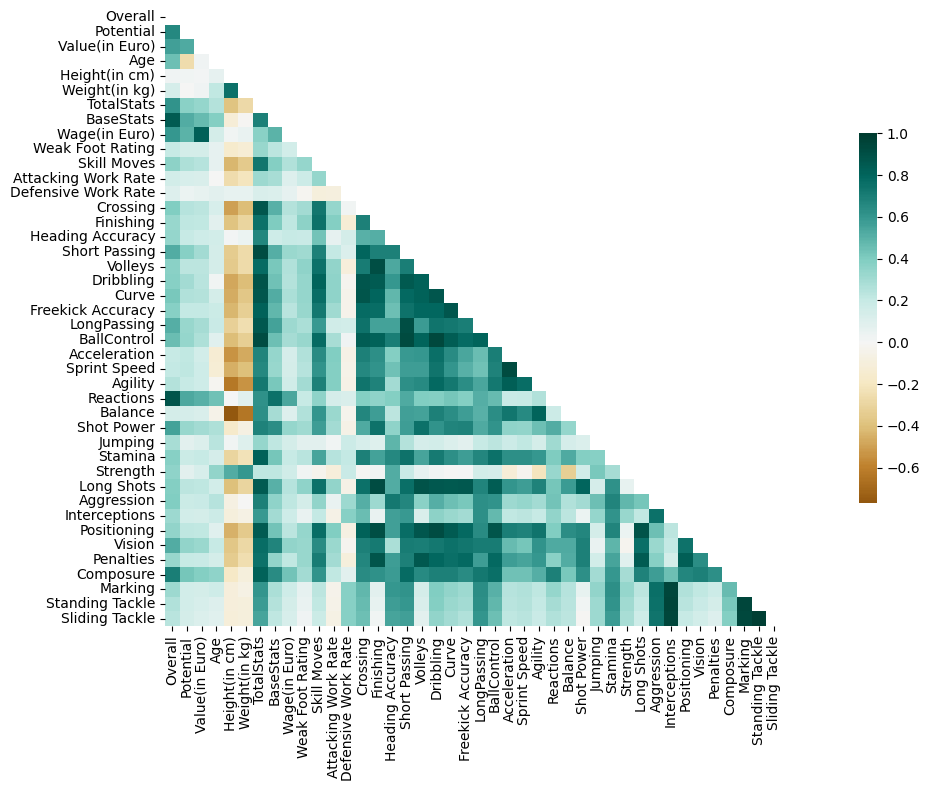

In [52]:
#Lo visualizamos en un mapa de calor

# Calculamos correlaciones
corr = dfmodel.corr(method = 'pearson')

# Máscara para que no se vea por duplicado los valores de correlaciones:
mask = np.triu(np.ones_like(corr, dtype = np.bool))

# Crear figura de matplotlib
f, ax = plt.subplots(figsize =(20,8))

# Dibujamos el heatmap de correlaciones con todos los atributos que hemos creado
sns.heatmap(corr, mask = mask, cmap = 'BrBG', vmax = 1, center = 0, square = True, annot= False, fmt= '.2f', cbar_kws={'shrink': 0.6})

Eliminaremos weight y height porque no tienen relación alguna con el potencial

In [78]:
dfmodel.drop(['Height(in cm)', 'Weight(in kg)'], axis=1, inplace=True)

C:\Users\jl_12\AppData\Local\Temp\ipykernel_2348\2221094017.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
#Ahora usamos el OneHotEncoder para las variables categóricas (Attacking y Defensive Work Rate)

from sklearn.preprocessing import OneHotEncoder #Librería
obj_vars = dfmodel.select_dtypes(include = 'object').columns #Columnas categóricas (object)
encoder = OneHotEncoder() #Encoder
for var in obj_vars: #Entrenamos el encoder en cada variable
  encoder.fit(dfmodel.loc[:,[var]])
  enc_data = pd.DataFrame(encoder.transform(dfmodel.loc[:,[var]]).toarray(), columns = [var + '_' + typevar for typevar in encoder.categories_[0].tolist()], index = dfmodel.index)
  dfmodel = pd.concat([dfmodel, enc_data], axis = 1)
  dfmodel = dfmodel.drop([var], axis = 1)

In [55]:
dfmodel

In [56]:
#adaptamos la fórmula anterior para buscar -
def guiones(df):
    for c in df.columns:
        hayguion = df[c].apply(lambda x: x == 'None').sum()
        print('{} - {}'.format(c, hayguion))

In [80]:
#Separamos el dataset en train y test dataset.
from sklearn.model_selection import train_test_split
train, test = train_test_split(dfmodel, test_size=0.1, random_state=10)

In [81]:
#Creamos las variables de train y test
X_train = train.drop(["Potential"], axis=1)
Y_train = train["Potential"]
X_test  = test.drop(["Potential"], axis=1)
Y_test = test["Potential"]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((16578, 43), (16578,), (1842, 43), (1842,))

### ElasticNet

In [59]:
#Librerías
from sklearn.linear_model import ElasticNet
#Inicializamos modelo y parámetros
alpha = .1 #Parámetro que mide el peso que tienen los regularizadores frente a la función original
l1_ratio = .1 #Parámetro que mide el tradeoff entre el peso l1 y el l2
#Instanciamos el modelo
model = ElasticNet(alpha = alpha, l1_ratio = l1_ratio, max_iter = 100, random_state = 0)
#Entrenamos modelo y elaboramos predicciones
model.fit(X_train, Y_train)
mse_ElasticNet = np.sum((Y_test-model.predict(X_test))**2)/1000

c:\Users\jl_12\.vscode\samplerepo\venv_analytics\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.394e+04, tolerance: 6.324e+01
  model = cd_fast.enet_coordinate_descent(


### SGD Regressor

In [60]:
#Librerías
from sklearn.linear_model import SGDRegressor
#Inicializamos modelo y parámetros
penalty = 'elasticnet' #Elegimos entre penalización 'l2', 'l1' o 'elasticnet'
alpha = .1 #Parámetro que mide el peso que tienen los regularizadores frente a la función original
l1_ratio = .1 #Parámetro que mide el tradeoff entre el peso l1 y el l2
#Instanciamos el modelo
model = SGDRegressor(penalty = penalty, alpha = alpha, l1_ratio = l1_ratio, max_iter = 100, random_state = 0)
#Entrenamos modelo y elaboramos predicciones
model.fit(X_train, Y_train)
mse_SGDRegressor = np.sum((Y_test-model.predict(X_test))**2)/1000

### SVM

In [61]:
#Librerías
from sklearn import svm
#Inicializamos modelo y parámetros
C = 1 #Parámetro regularizador
kernel = 'rbf' #Núcleo transformador
#Instanciamos el modelo
model = svm.SVR(C = C, kernel = kernel)
#Entrenamos modelo y elaboramos predicciones
model.fit(X_train, Y_train)
mse_SVR = np.sum((Y_test-model.predict(X_test))**2)/1000

### Random Forest Regressor

In [62]:
#Librerías
from sklearn.ensemble import RandomForestRegressor
#Inicializamos modelo y parámetros
n_estimators = 200 #Estimadores del modelo
criterion = 'mse' #Forma de calcular el error
max_depth = None #Límite de profundidad de los árboles
min_samples_split = 2 #Criterio de parada de profundidad
verbose = 1 #Información devuelta por el método
#Instanciamos el modelo
model = RandomForestRegressor(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, verbose=verbose)
#Entrenamos modelo y elaboramos predicciones
model.fit(X_train, Y_train)
mse_RF = np.sum((Y_test-model.predict(X_test))**2)/1000

c:\Users\jl_12\.vscode\samplerepo\venv_analytics\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   33.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


### XGB Boost

In [63]:
#Librerías
import xgboost as xgb
#Inicializamos modelo y parámetros
params = {"booster":"gbtree", "max_depth": 2, "eta": 0.3, "objective": "reg:squarederror", "nthread":2}
num_boost_round = 10
#Convertimos los datos a formato DMatrix
train_data = xgb.DMatrix(X_train, label=Y_train)
test_data = xgb.DMatrix(X_test, label=Y_test)
#Instanciamos el modelo, entrenamos y elaboramos predicciones
model = xgb.train(params = params, dtrain = train_data, num_boost_round=num_boost_round)
mse_XGB = np.sum((Y_test-model.predict(test_data))**2)/1000

### Resultados y comparativa

Text(0.5, 0, 'Modelo')

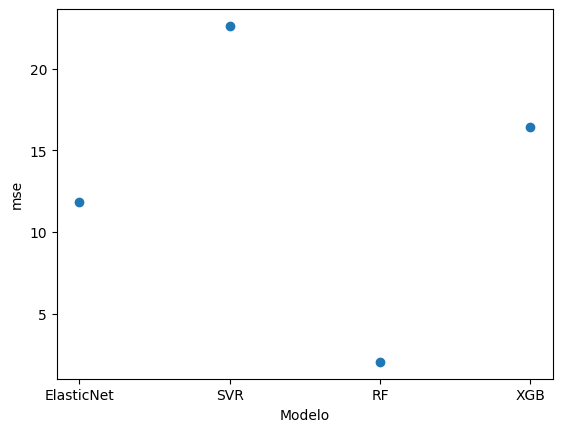

In [65]:
mse = [mse_ElasticNet, mse_SVR, mse_RF, mse_XGB]
plt.scatter(['ElasticNet', 'SVR', 'RF', 'XGB'], mse)
plt.ylabel('mse')
plt.xlabel('Modelo')

In [91]:
print(mse)

[11.825672472455024, 22.607133470163415, 2.048310999999999, 16.392717810499278]


Recuperamos nuestro random forest

In [66]:
#Librerías
from sklearn.ensemble import RandomForestRegressor
#Inicializamos modelo y parámetros
n_estimators = 200 #Estimadores del modelo
criterion = 'mse' #Forma de calcular el error
max_depth = None #Límite de profundidad de los árboles
min_samples_split = 2 #Criterio de parada de profundidad
verbose = 1 #Información devuelta por el método
#Instanciamos el modelo
model = RandomForestRegressor(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, verbose=verbose)
#Entrenamos modelo y elaboramos predicciones
model.fit(X_train, Y_train)
prediccion = model.predict(X_test)

c:\Users\jl_12\.vscode\samplerepo\venv_analytics\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   33.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [67]:
ejey = np.array(Y_test)

In [68]:
prediccion

array([61.62 , 70.7  , 68.   , ..., 67.01 , 72.31 , 66.025])

In [72]:
import plotly_express as px

In [75]:
px.scatter(x = ejey, y = prediccion)

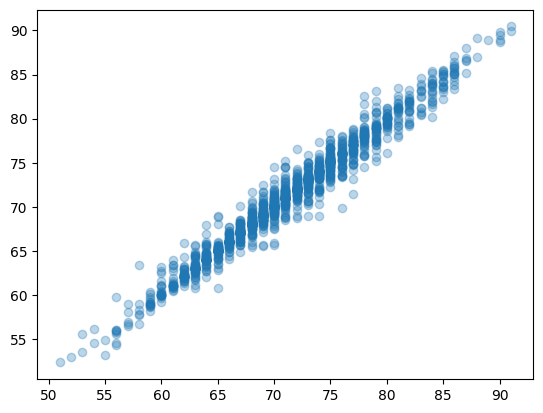

In [71]:
plt.scatter(ejey, prediccion, alpha=0.3)